<a href="https://colab.research.google.com/github/Kashish12471/Codealpha-tasks/blob/main/TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")


df.columns = df.columns.str.strip()


df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate',
    'Region.1': 'Zone'
}, inplace=True)

df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

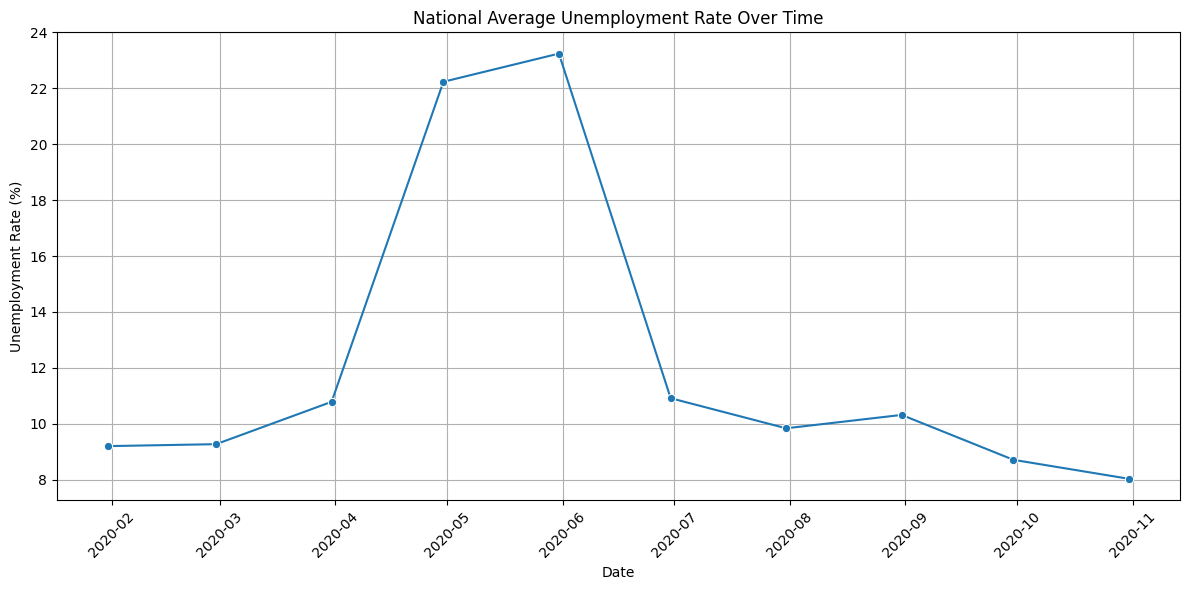

In [ ]:
national_trend = df.groupby('Date')['Unemployment_Rate'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=national_trend, x='Date', y='Unemployment_Rate', marker='o')
plt.title('National Average Unemployment Rate Over Time')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

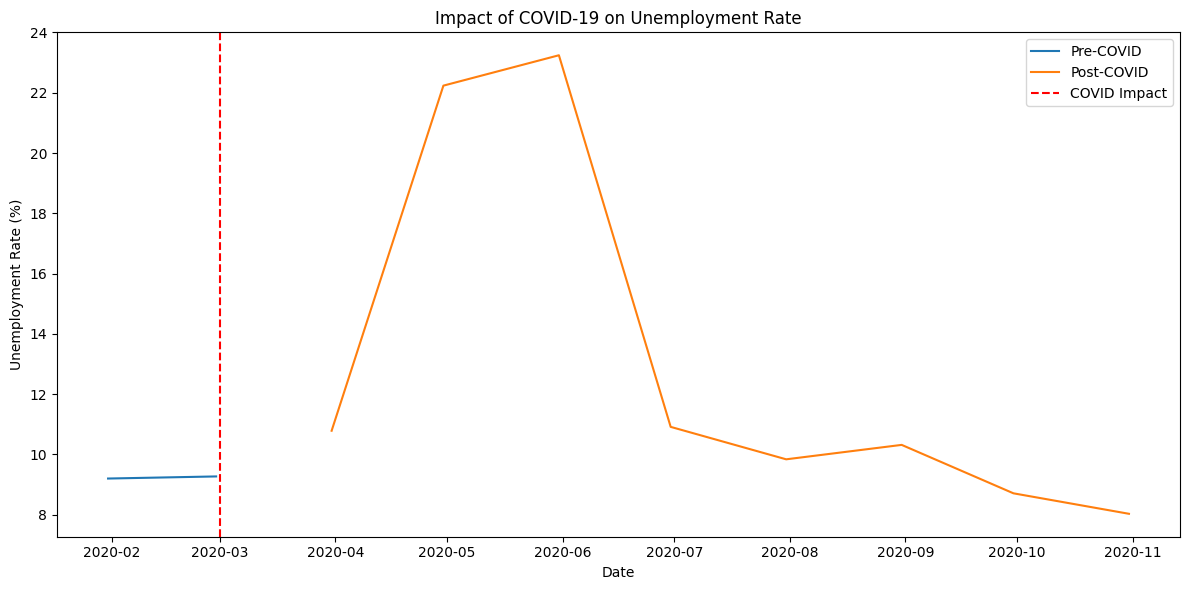

In [ ]:
pre_covid = df[df['Date'] < '2020-03-01']
post_covid = df[df['Date'] >= '2020-03-01']

plt.figure(figsize=(12,6))
sns.lineplot(data=pre_covid.groupby('Date')['Unemployment_Rate'].mean(), label='Pre-COVID')
sns.lineplot(data=post_covid.groupby('Date')['Unemployment_Rate'].mean(), label='Post-COVID')
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='COVID Impact')
plt.title('Impact of COVID-19 on Unemployment Rate')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-9-1895818039.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Unemployment_Rate', data=df, palette='coolwarm')


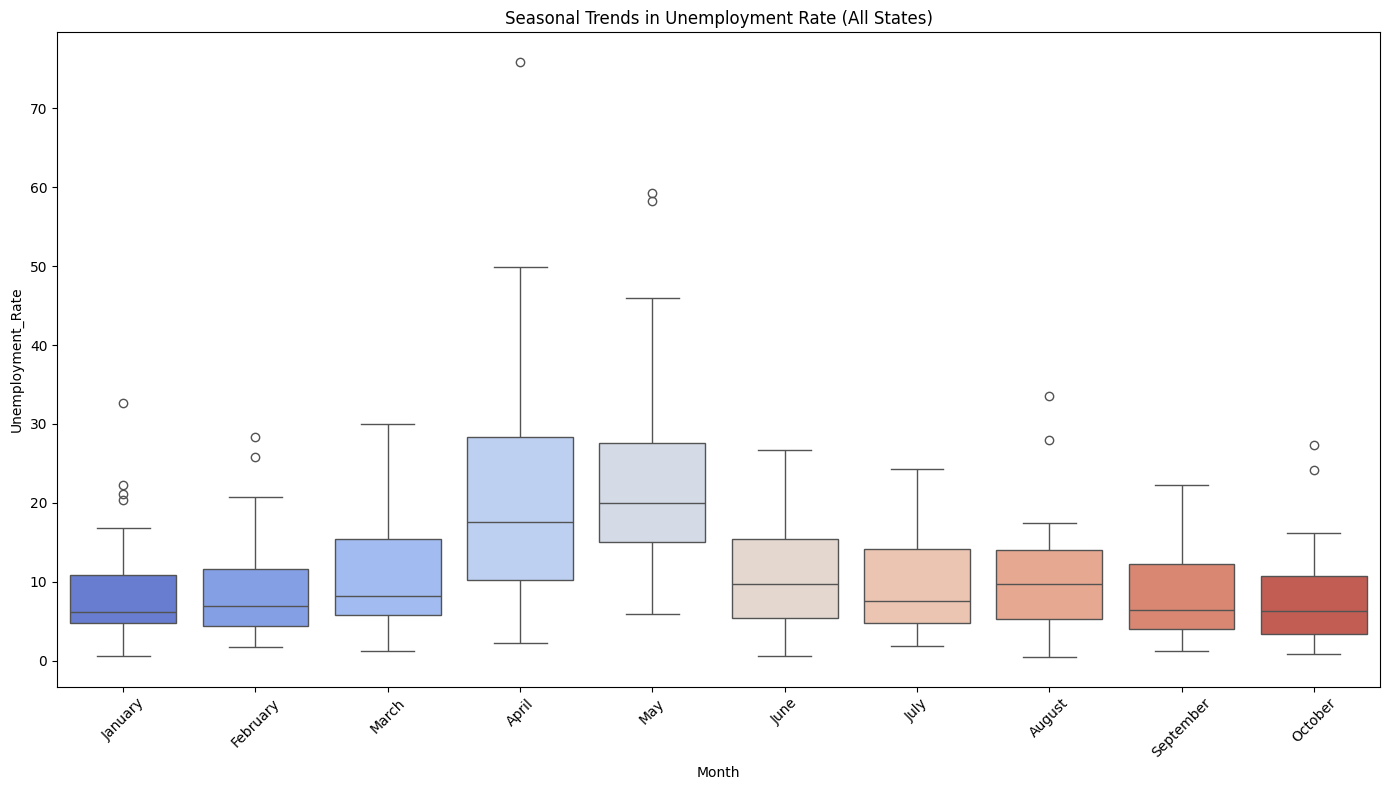

In [ ]:
monthly_trend = df.groupby(['Region', 'Month'])['Unemployment_Rate'].mean().reset_index()

plt.figure(figsize=(14,8))
sns.boxplot(x='Month', y='Unemployment_Rate', data=df, palette='coolwarm')
plt.title('Seasonal Trends in Unemployment Rate (All States)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

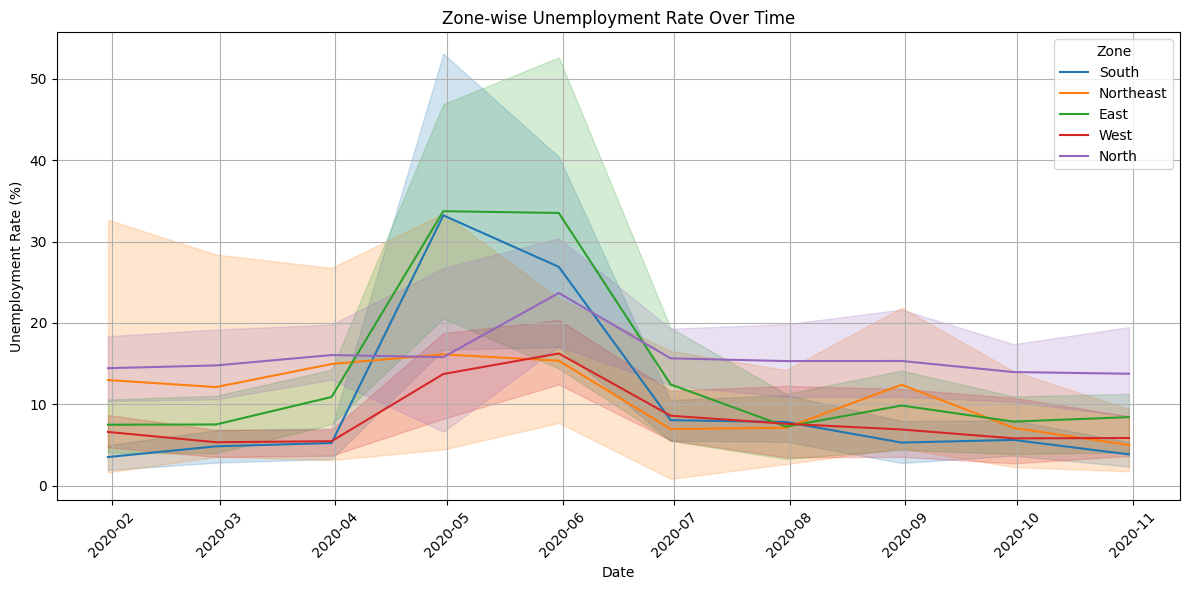

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate', hue='Zone')
plt.title('Zone-wise Unemployment Rate Over Time')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()